In [53]:
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import time

In [2]:
def setting_data(data=None):
    feature_matrix = np.ones((np.ma.size(data,axis=0),np.ma.size(data,axis=1)+1))
    feature_matrix[:,1:] = data
    return feature_matrix

In [3]:
def predict_values(feature_matrix=None, weights=None):
    return np.dot(a=feature_matrix,b=weights)

In [121]:
def polynomial_features_generation(data=None, degree=0):
    return np.hstack((data,np.power(data,np.arange(start=2,stop=degree+1))))

In [5]:
def normalize_data(data=None):
    data = data.astype(float)
    for i in range(data.shape[1]):
        data[:,i] = np.divide(np.subtract(data[:,i],np.mean(data[:,i])), np.std(data[:,i])).astype(float)
    return data

In [16]:
def gradient_descent(x=None,y=None,tolerance_gradient=0.01, tolerance_cost=0.0000001,
                     alpha = 0.001, max_iter=10000,l2_regularization=0):
   
    feature_matrix = setting_data(data=x)
    
    weights = np.random.rand(x.shape[1] + 1, 1)
    partials = np.zeros(x.shape[1]+1).reshape((-1,1))
    
    i = 0
    prev_cost = 10
    costs = []
    gradients = []
    
    converged = False
    while not converged:
        i += 1
        
        predicted = predict_values(feature_matrix=feature_matrix, weights=weights)
        errors = np.subtract(predicted, y)
        #Updating weights
        
        #taking derivative
        partials = np.dot(feature_matrix.T,errors)
        #This is the total change :p
#         step_size = np.multiply(alpha,partials)
#         weights_regularized = np.vstack((weights[0],np.multiply(weights[1:],1-2*alpha*l2_regularization)))
        
        weights = np.subtract(np.vstack((weights[0],np.multiply(weights[1:],1-2*alpha*l2_regularization))),
                              np.multiply(alpha,partials))
        
        gradient_magnitude = np.sqrt(np.sum(np.square(partials)))
        cur_cost = np.sum(np.square(errors))
        
#         gradients = np.append(gradients,gradient_magnitude)
#         costs = np.append(costs,cur_cost)
        gradients.append(gradient_magnitude)
        costs.append(cur_cost)

#         if i%1000==0:
#             print(cur_cost)
#         print(abs(cur_cost - prev_cost))
        if (gradient_magnitude <= tolerance_gradient) or (abs(cur_cost - prev_cost) < tolerance_cost):
            if gradient_magnitude <= tolerance_gradient:
                print('[Gradient Magnitude - Tolerance] Satisfied')
            else:
                print('[Cost Tolerance - Precision] Satisfied')
            converged = True

        if i >= max_iter:
            print('Iterations Completed')
            converged = True
        
        prev_cost = cur_cost
    return (i, np.array(weights),np.array(gradients), costs)

In [7]:
x = np.arange(-10, 11).reshape(-1,1)
y = (10 + 2*x + 5*x**2).astype(float).reshape(-1,1)

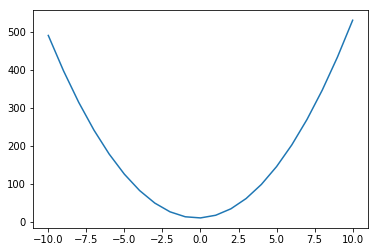

In [8]:
plt.plot(x, y)
plt.show()

Generating Polynomial Features

In [9]:
degree = 2
x_poly = polynomial_features_generation(x,degree)

In [10]:
x_norm = normalize_data(x_poly)
y_norm = (10 + 2*x_norm[:,0] + 5*x_norm[:,1]**2).reshape(-1,1)

In [17]:
start_time = time.time()
i,cal_weights, grads, costs = gradient_descent(x=x_poly, y=y,alpha=1e-5,tolerance_cost=1e-7,
                                               tolerance_gradient=1e-7, max_iter=1e7)
end_time = time.time()

[Cost Tolerance - Precision] Satisfied


In [18]:
print('Time taken: ',end_time-start_time)
print('Iterations: ',i)
print('Calculated weights:\n',cal_weights)

Time taken:  3.543224573135376
Iterations:  76464
Calculated weights:
 [[9.99239558]
 [2.        ]
 [5.00011559]]


Orignal weights were: 10    2    5

###### Running on real dataset

In [161]:
house_data = pd.read_csv('Related Datasets/kc_house_data.csv')
house_test_data = pd.read_csv('Related Datasets/kc_house_test_data.csv')
house_train_data = pd.read_csv('Related Datasets/kc_house_train_data.csv')

In [162]:
data = np.array(house_train_data['sqft_living']).reshape(-1,1)
target = np.array(house_train_data['price']).reshape(-1,1)

Normalizing data

In [163]:
data = normalize_data(data)
data.shape

(17384, 1)

Generating polynomail features

In [164]:
data = plynomial_features_generation(data,4)
data.shape

(17384, 4)

with small lambda

In [165]:
start_time = time.time()
i,weights_l2_0, grads, costs = gradient_descent(x=data, y=target,alpha=1e-12,tolerance_cost=1e-7,
                                               tolerance_gradient=1e-7, max_iter=1000,l2_regularization=0)
end_time = time.time()

Iterations Completed


In [166]:
print('Time taken: ',end_time-start_time)
print('Iterations: ',i)
np.set_printoptions(precision=10)
print('Calculated weights:\n',weights_l2_0)

Time taken:  0.18244552612304688
Iterations:  1000
Calculated weights:
 [[ 10.1814993756]
 [  4.3676006382]
 [ 17.8875423705]
 [ 56.2186123593]
 [285.755141929 ]]


With big lambda

In [167]:
start_time = time.time()
i,weights_l2_1e11, grads, costs = gradient_descent(x=data, y=target,alpha=1e-12,tolerance_cost=1e-7,
                                               tolerance_gradient=1e-7, max_iter=1000,l2_regularization=1e11)
end_time = time.time()

Iterations Completed


In [168]:
print('Time taken: ',end_time-start_time)
print('Iterations: ',i)
np.set_printoptions(precision=10)
print('Calculated weights:\n',weights_l2_1e11)

Time taken:  0.18956398963928223
Iterations:  1000
Calculated weights:
 [[10.1188985258]
 [ 0.0225762813]
 [ 0.0959568567]
 [ 0.3431499141]
 [ 2.1470536065]]


Iterations Completed


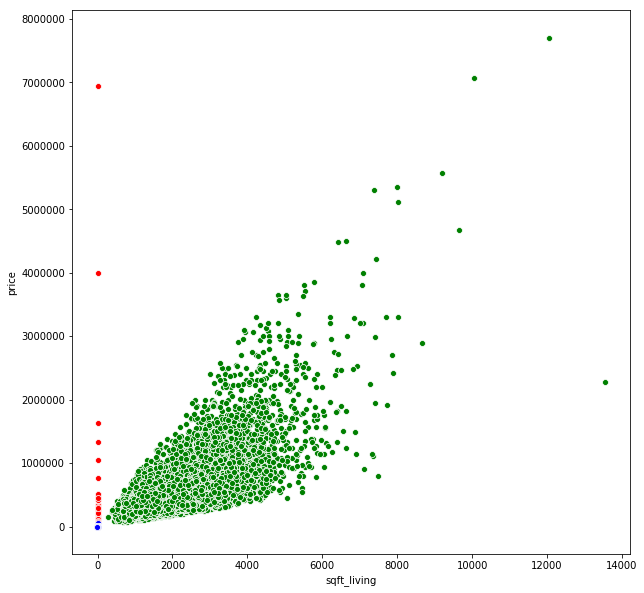

In [174]:
plt.figure(figsize=(10,10))

result_l2_0 = weights_l2_0[0] + weights_l2_0[1]*data[:,0] + weights_l2_0[2]*data[:,1] + weights_l2_0[3]*data[:,2] + weights_l2_0[4]*data[:,3]
temp_df_small_l2 = pd.DataFrame(data)
temp_df_small_l2['predicted_price'] = result_l2_0
sns.scatterplot(data=temp_df_small_l2,x=0,y='predicted_price',color='r')

result_l2_1e11 = weights_l2_1e11[0] + weights_l2_1e11[1]*data[:,0] + weights_l2_1e11[2]*data[:,1] + weights_l2_1e11[3]*data[:,2] + weights_l2_1e11[4]*data[:,3]
temp_df_big_l2 = pd.DataFrame(data)
temp_df_big_l2['predicted_price'] = result_l2_1e11
sns.scatterplot(data=temp_df_big_l2,x=0,y='predicted_price',color='b')

sns.scatterplot(data=house_train_data,x='sqft_living',y='price',color='g')

In [178]:
print('For 0 l2:',root_mean_squared_error(result_l2_0,target,target.shape[0]))
print('For 1e12 l2:',root_mean_squared_error(result_l2_1e11,target,target.shape[0]))

For 0 l2: 86363005.19583146
For 1e12 l2: 86212057.62682746


In [183]:
df = pd.DataFrame({'y_true': target[:,0], 'y_pred_no_reg': result_l2_0, 'y_pred_reg': result_l2_1e11})
df.head()

,y_true,y_pred_no_reg,y_pred_reg
0,221900.0,230.535859,11.103986
1,538000.0,48.836973,9.663396
2,180000.0,1045.295937,17.343138
3,604000.0,9.874101,9.399721
4,510000.0,17.201733,9.457604


In [182]:
target.shape

(17384, 1)

/home/nauman/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


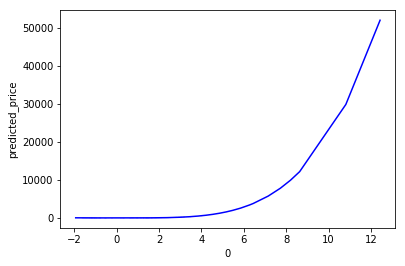

In [173]:
sns.lineplot(data=temp_df_big_l2,x=0,y='predicted_price',color='b')

In [175]:
def root_mean_squared_error(y=None,y_bar=None,no_of_observations=0):
    return np.sqrt(np.divide(np.sum(np.square(np.subtract(y,y_bar))),no_of_observations))

In [176]:
a = np.array([1,2,3]).reshape(-1,1)